In [1]:
# Importing necessary modules and libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from keras.layers import (Input, InputLayer, Conv2D, MaxPooling2D, Flatten, ELU, Dense, BatchNormalization, 
                          Activation, GlobalAveragePooling2D, Dropout)
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Nadam

# ignoring warnings
warnings.filterwarnings('ignore')

2024-06-11 12:15:19.500546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 12:15:19.500658: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 12:15:19.777504: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/new-dataset/training.csv") # reading data

In [3]:
df.head() # first 5 values

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [4]:
df.tail() # bottom 5 values

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,50.754202,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447
7048,66.938311,43.424510,31.096059,39.528604,NaN,NaN,NaN,NaN,NaN,NaN,...,47.069250,73.033339,NaN,NaN,NaN,NaN,NaN,NaN,45.900480,82.773096


In [5]:
df.info() # info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [6]:
df.describe() # describes numeric staistics of the dataset

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [7]:
df.isnull().sum() # shows null count of the dataset

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [8]:
# imputing data for missing values

for i in df.columns:
    mean_value = df[i].mean()
    df[i].fillna(mean_value, inplace=True)

In [9]:
df.isnull().sum() # checking if null values have been corrected

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [10]:
dataset_dir = "/kaggle/input/new-dataset/images/train_images" # dataset directory

# function to load and preprocess images
def load_image(image_path):
    # reading images
    img = tf.io.read_file(image_path)
    # decoding jpeg images
    img = tf.image.decode_jpeg(img, channels=3)
    # resizing images
    img = tf.image.resize(img, (96, 96))
    # normalizing images
    img = img / 255.0
    return img

# function to get the image paths and corresponding labels
def get_image_paths_and_labels(dataset_dir):
    image_paths = []
    labels = []
    for image_path in Path(dataset_dir).glob('*.jpg'):
        # getting the numeric part of the filename as the label
        label = int(image_path.stem)
        image_paths.append(str(image_path))
        labels.append(label)
    return image_paths, labels

# calling function to get path and labels
image_paths, labels = get_image_paths_and_labels(dataset_dir)

# creating a tf.data.Dataset from the image paths
image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
image_dataset = image_dataset.map(load_image)

# converting labels to tensors
labels = tf.convert_to_tensor(labels)

# combininng the image dataset and labels into a single dataset
train_dataset = tf.data.Dataset.zip((image_dataset, tf.data.Dataset.from_tensor_slices(labels)))
train_dataset = train_dataset.batch(32)

# iterating through the dataset and extract images and labels
train_images = []
train_labels = []

for images, lbls in train_dataset:
    train_images.extend(images.numpy())
    train_labels.extend(lbls.numpy())

# converting lists to arrays
images = np.array(train_images)
labels = np.array(train_labels)

print(images.shape, labels.shape)

(7049, 96, 96, 3) (7049,)


In [11]:
# taking values out of the dataframe by indicing using corresponding labels

target_values = df.loc[labels].values # locks onto a row index through the image label
print("Target values shape:", target_values.shape)

Target values shape: (7049, 30)


In [12]:
import gc # calling garbage collector to reduce memory utilization

del train_dataset

gc.collect()

53

### Plotwork

<function matplotlib.pyplot.show(close=None, block=None)>

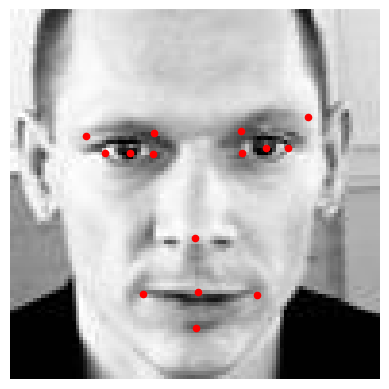

In [13]:
plt.imshow(images[2500])
plt.axis('off')

keypoints = target_values[2500]

for i in range(0, 30, 2):
    x = keypoints[i]
    y = keypoints[i+1]
    plt.scatter(x, y, c='red', s=20)
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

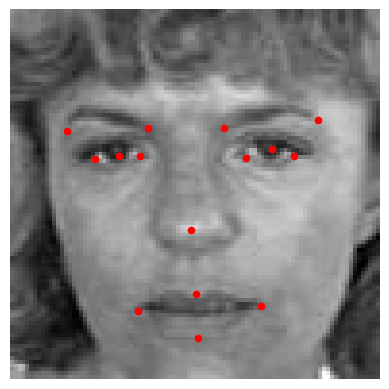

In [14]:
plt.imshow(images[1100])
plt.axis('off')

keypoints = target_values[1100]

for i in range(0, 30, 2):
    x = keypoints[i]
    y = keypoints[i+1]
    plt.scatter(x, y, c='red', s=20)
    
plt.show

In [15]:
# normalizing features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

target_values = scaler.fit_transform(target_values)

In [16]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(images, target_values, test_size=0.3,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5,random_state=42)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (4934, 96, 96, 3)
y_train: (4934, 30)
x_test: (1057, 96, 96, 3)
y_test: (1057, 30)
x_val: (1058, 96, 96, 3)
y_val: (1058, 30)


### VGG16

In [17]:
from keras.applications import VGG16

# Loading model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
feature_extractor = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer('block4_pool').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(30, activation='linear')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_mean_absolute_error', save_best_only=True, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(mode='min', monitor='val_mean_absolute_error', factor=0.1, patience=5, min_lr=0.00000001, verbose=1)

model.summary() # printing summary of model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,228,126 (31.39 MB)

 Trainable params: 592,862 (2.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) # compiling and fitting model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=40,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20
  5/124 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.3790 - mean_absolute_error: 0.8722

I0000 00:00:1718108168.363871      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718108168.384001      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.3038 - mean_absolute_error: 0.4050

W0000 00:00:1718108177.031154      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718108178.037576      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_mean_absolute_error improved from inf to 0.08805, saving model to model.keras


W0000 00:00:1718108182.780929      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 27s 119ms/step - loss: 0.3026 - mean_absolute_error: 0.4041 - val_loss: 0.0177 - val_mean_absolute_error: 0.0881 - learning_rate: 0.0010
Epoch 2/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0797
Epoch 2: val_mean_absolute_error improved from 0.08805 to 0.03114, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0125 - mean_absolute_error: 0.0795 - val_loss: 0.0026 - val_mean_absolute_error: 0.0311 - learning_rate: 0.0010
Epoch 3/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0045 - mean_absolute_error: 0.0485
Epoch 3: val_mean_absolute_error improved from 0.03114 to 0.03049, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0045 - mean_absolute_error: 0.0485 - val_loss: 0.0025 - val_mean_absolute_error: 0.0305 - learning_rate: 0.0010
Epoch 4/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040 - mean_absolute_error: 0.0460
Epoch 4: val_mean_abso

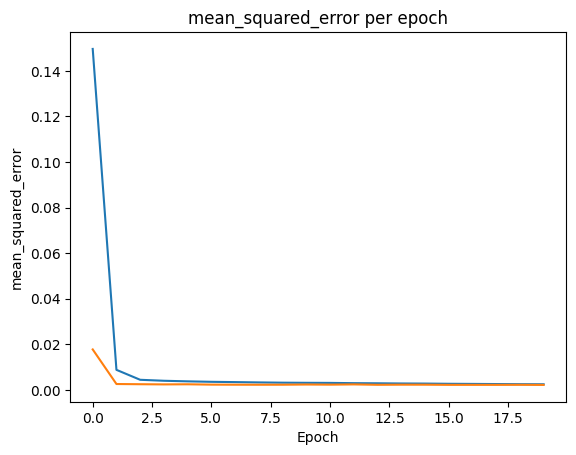

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("mean_squared_error")
plt.title("mean_squared_error per epoch")
plt.show()

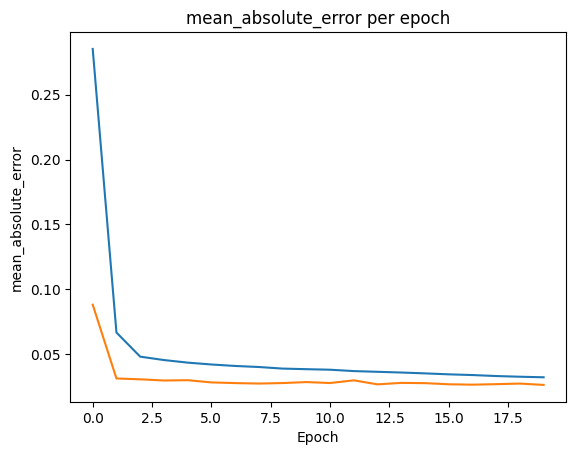

In [20]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel("Epoch")
plt.ylabel("mean_absolute_error")
plt.title("mean_absolute_error per epoch")
plt.show()

In [21]:
model1 = keras.models.load_model('model.keras') # evaluating best model on test data

model1.evaluate(x_test,y_test)

 7/34 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0026 - mean_absolute_error: 0.0285

W0000 00:00:1718108276.377289      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0021 - mean_absolute_error: 0.0259


[0.0019447957165539265, 0.02533789537847042]

In [22]:
keypoints = model1.predict(np.expand_dims(x_test[10], axis=0))[0] # finding keypoint of an unknown image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


In [23]:
keypoints = scaler.inverse_transform(keypoints.reshape(1, -1))

keypoints

array([[64.47944 , 36.719696, 29.520905, 37.0319  , 58.12636 , 37.528667,
        71.53884 , 37.762516, 35.50277 , 37.75319 , 21.83119 , 37.656174,
        54.138485, 29.22379 , 77.575134, 29.627584, 38.02036 , 29.155664,
        15.55464 , 29.713486, 46.57914 , 61.57991 , 61.12146 , 75.583496,
        31.50364 , 75.51035 , 46.935135, 72.52924 , 46.796753, 76.17873 ]],
      dtype=float32)

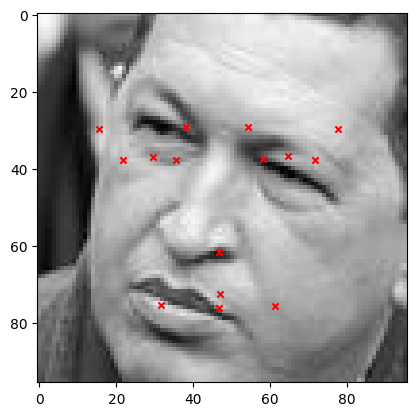

In [24]:

plt.imshow(x_test[10])

for i in range(0, 30, 2):
    x = keypoints[0][i]
    y = keypoints[0][i+1]
    plt.scatter(x, y, c='red', s=20, marker='x')

plt.show()

### ResNet50

In [25]:
from keras.applications import ResNet50

# Loading model
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
feature_extractor = Model(inputs=resnet50_model.input, outputs=resnet50_model.get_layer('conv4_block3_out').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(30, activation='linear')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

# Setting callbacks
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_mean_absolute_error', save_best_only=True, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(mode='min', monitor='val_mean_absolute_error', factor=0.1, patience=5, min_lr=0.00000001, verbose=1)

model.summary() # printing summary of model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 102, 102,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 48, 48,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 48, 48,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 48, 48,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 50, 50,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 24, 24,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 24, 24,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 24, 24,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 24, 24,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 24, 24,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 24, 24,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 24, 24,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 24, 24,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 24, 24,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 24, 24,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 24, 24,    │      1,024 │ conv2_block1_3_c

 Total params: 43,041,118 (164.19 MB)

 Trainable params: 37,817,310 (144.26 MB)

 Non-trainable params: 5,223,808 (19.93 MB)

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) # compiling and fitting model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=40,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20
  5/124 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 33.6628 - mean_absolute_error: 3.8430

W0000 00:00:1718108556.839412      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 6.5122 - mean_absolute_error: 1.1972

W0000 00:00:1718108564.862803      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718108567.726905      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_mean_absolute_error improved from inf to 0.40242, saving model to model.keras


W0000 00:00:1718108571.097948      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 27s 133ms/step - loss: 6.4752 - mean_absolute_error: 1.1928 - val_loss: 0.1840 - val_mean_absolute_error: 0.4024 - learning_rate: 0.0010
Epoch 2/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1832 - mean_absolute_error: 0.3888
Epoch 2: val_mean_absolute_error improved from 0.40242 to 0.33232, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.1831 - mean_absolute_error: 0.3885 - val_loss: 0.1302 - val_mean_absolute_error: 0.3323 - learning_rate: 0.0010
Epoch 3/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1256 - mean_absolute_error: 0.3172
Epoch 3: val_mean_absolute_error improved from 0.33232 to 0.26621, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.1254 - mean_absolute_error: 0.3170 - val_loss: 0.0880 - val_mean_absolute_error: 0.2662 - learning_rate: 0.0010
Epoch 4/20
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0896 - mean_absolute_error: 0.2542
Epoch 4: val_mean_abso

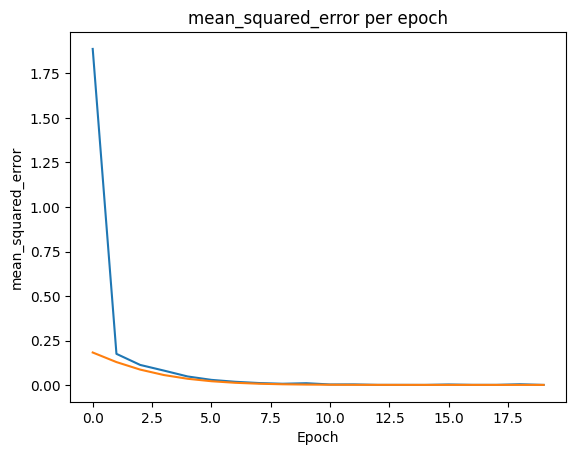

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("mean_squared_error")
plt.title("mean_squared_error per epoch")
plt.show()

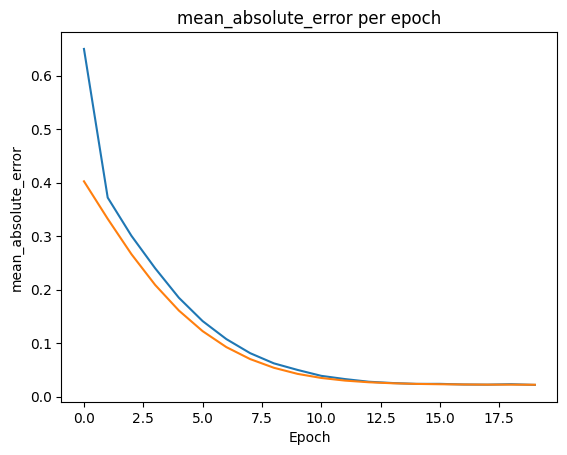

In [28]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel("Epoch")
plt.ylabel("mean_absolute_error")
plt.title("mean_absolute_error per epoch")
plt.show()

In [29]:
model1 = keras.models.load_model('model.keras')

model1.evaluate(x_test,y_test)

13/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0024 - mean_absolute_error: 0.0234

W0000 00:00:1718108695.319211      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0021 - mean_absolute_error: 0.0223


[0.001998790306970477, 0.02180420234799385]

### DenseNet121

In [30]:
from keras.applications import DenseNet121

# Loading model
densenet121_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
feature_extractor = Model(inputs=densenet121_model.input, outputs=densenet121_model.get_layer('conv5_block6_concat').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False
    
# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(30, activation='linear')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_mean_absolute_error', save_best_only=True, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(mode='min', monitor='val_mean_absolute_error', factor=0.1, patience=5, min_lr=0.00000001, verbose=1)

model.summary() # printing summary of model

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 102, 102,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 48, 48,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 48, 48,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 48, 48,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 50, 50,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 24, 24,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 24, 24,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 24, 24,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 24, 24,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 24, 24,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 24, 24,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 24, 24,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 24, 24,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 24, 24,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 24, 24,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 24, 24,    │     12,288 │ conv2_block2_0_r

 Total params: 6,329,758 (24.15 MB)

 Trainable params: 789,470 (3.01 MB)

 Non-trainable params: 5,540,288 (21.13 MB)

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) # compiling and fitting model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=40,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0395 - mean_absolute_error: 0.1344

W0000 00:00:1718108744.158099      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_mean_absolute_error improved from inf to 0.02887, saving model to model.keras


W0000 00:00:1718108763.027570      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 61s 288ms/step - loss: 0.0393 - mean_absolute_error: 0.1340 - val_loss: 0.0022 - val_mean_absolute_error: 0.0289 - learning_rate: 0.0010
Epoch 2/20
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0044 - mean_absolute_error: 0.0487
Epoch 2: val_mean_absolute_error improved from 0.02887 to 0.02689, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0044 - mean_absolute_error: 0.0487 - val_loss: 0.0021 - val_mean_absolute_error: 0.0269 - learning_rate: 0.0010
Epoch 3/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0037 - mean_absolute_error: 0.0438
Epoch 3: val_mean_absolute_error did not improve from 0.02689
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0037 - mean_absolute_error: 0.0438 - val_loss: 0.0021 - val_mean_absolute_error: 0.0272 - learning_rate: 0.0010
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0034 - mean_absolute_error: 0.0418
Epoch 4: val_mean_absolute_error did not improve from 0

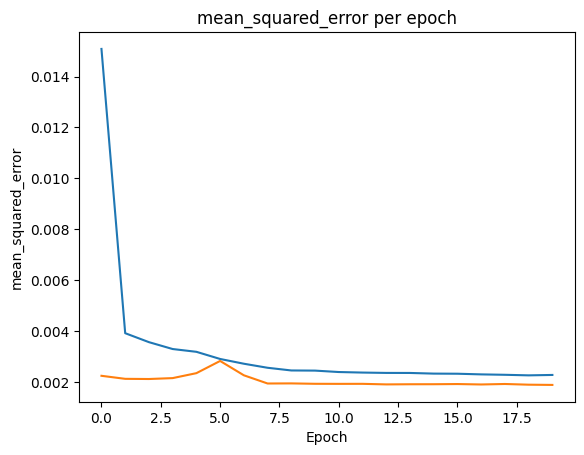

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("mean_squared_error")
plt.title("mean_squared_error per epoch")
plt.show()

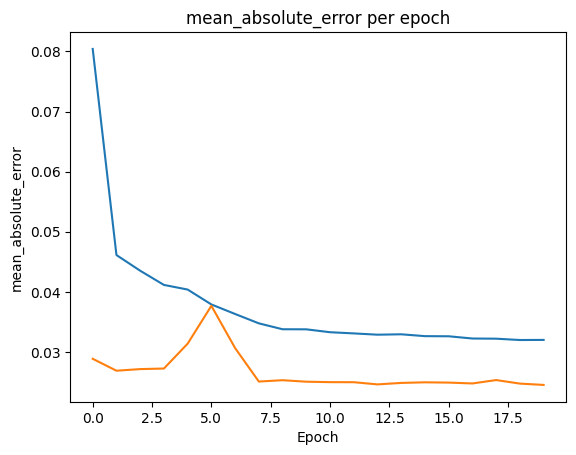

In [33]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel("Epoch")
plt.ylabel("mean_absolute_error")
plt.title("mean_absolute_error per epoch")
plt.show()

In [34]:
model1 = keras.models.load_model('model.keras')

model1.evaluate(x_test,y_test)

 7/34 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0023 - mean_absolute_error: 0.0268

W0000 00:00:1718108853.830531      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 25s 271ms/step - loss: 0.0018 - mean_absolute_error: 0.0245


[0.001721504027955234, 0.024000566452741623]

### Xception

In [35]:
from keras.applications import Xception

# Loading model
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
feature_extractor = Model(inputs=xception_model.input, outputs=xception_model.get_layer('block14_sepconv2_act').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(30, activation='linear')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_mean_absolute_error', save_best_only=True, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(mode='min', monitor='val_mean_absolute_error', factor=0.1, patience=5, min_lr=0.00000001, verbose=1)

model.summary() # printing summary of model

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 47, 47,    │        864 │ input_layer_3[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 47, 47,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 47, 47,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 45, 45,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 45, 45,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 45, 45,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 45, 45,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 45, 45,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 45, 45,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 45, 45,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 45, 45,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 23, 23,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 23, 23,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 23, 23,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 23, 23,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 23, 23,    │          0 │ add[0][0]       

 Total params: 23,027,206 (87.84 MB)

 Trainable params: 2,165,726 (8.26 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) # compiling and fitting model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=40,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0935 - mean_absolute_error: 0.2077

W0000 00:00:1718108887.722487      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_mean_absolute_error improved from inf to 0.06107, saving model to model.keras


W0000 00:00:1718108895.819724      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 31s 148ms/step - loss: 0.0930 - mean_absolute_error: 0.2070 - val_loss: 0.0065 - val_mean_absolute_error: 0.0611 - learning_rate: 0.0010
Epoch 2/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0092 - mean_absolute_error: 0.0729
Epoch 2: val_mean_absolute_error improved from 0.06107 to 0.04526, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0092 - mean_absolute_error: 0.0728 - val_loss: 0.0041 - val_mean_absolute_error: 0.0453 - learning_rate: 0.0010
Epoch 3/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0075 - mean_absolute_error: 0.0646
Epoch 3: val_mean_absolute_error improved from 0.04526 to 0.03722, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0074 - mean_absolute_error: 0.0646 - val_loss: 0.0031 - val_mean_absolute_error: 0.0372 - learning_rate: 0.0010
Epoch 4/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0056 - mean_absolute_error: 0.0554
Epoch 4: val_mean_abso

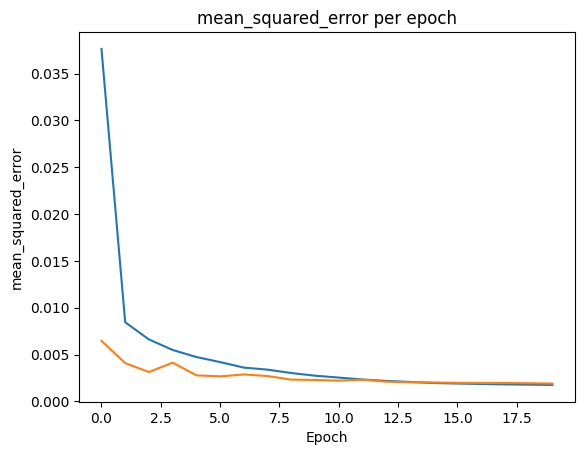

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("mean_squared_error")
plt.title("mean_squared_error per epoch")
plt.show()

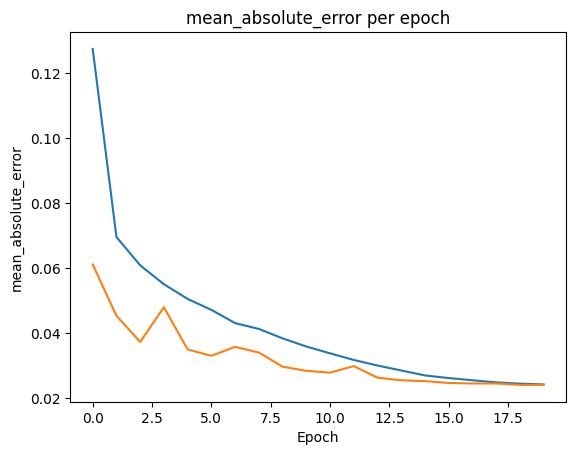

In [38]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel("Epoch")
plt.ylabel("mean_absolute_error")
plt.title("mean_absolute_error per epoch")
plt.show()

In [39]:
model1 = keras.models.load_model('model.keras')

model1.evaluate(x_test,y_test)

 7/34 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0024 - mean_absolute_error: 0.0272

W0000 00:00:1718109000.177425      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - loss: 0.0019 - mean_absolute_error: 0.0245


[0.0018191523849964142, 0.023877710103988647]

### Inception

In [40]:
from keras.applications import InceptionV3

# Loading model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
feature_extractor = Model(inputs=inception_model.input, outputs=inception_model.get_layer('mixed10').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(30, activation='linear')(x)

# binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_mean_absolute_error', save_best_only=True, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(mode='min', monitor='val_mean_absolute_error', factor=0.1, patience=5, min_lr=0.00000001, verbose=1)

model.summary() # printing summary of model

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 47, 47,    │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 47, 47,    │         96 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 47, 47,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 45, 45,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 45,    │         96 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 45, 45,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 45, 45,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 45,    │        192 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 45, 45,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 22, 22,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 22, 22,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 22, 22,    │        240 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 22, 22,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 20, 20,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 20,    │        576 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 20, 20,    │          0 │ batch_normalizat

 Total params: 23,968,510 (91.43 MB)

 Trainable params: 2,165,726 (8.26 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) # compiling and fitting model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=40,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.2771 - mean_absolute_error: 0.4371

W0000 00:00:1718109037.792527      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_mean_absolute_error improved from inf to 0.19952, saving model to model.keras


W0000 00:00:1718109052.067888      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 45s 217ms/step - loss: 0.2765 - mean_absolute_error: 0.4366 - val_loss: 0.0771 - val_mean_absolute_error: 0.1995 - learning_rate: 0.0010
Epoch 2/20
121/124 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.1575
Epoch 2: val_mean_absolute_error improved from 0.19952 to 0.04560, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0511 - mean_absolute_error: 0.1560 - val_loss: 0.0047 - val_mean_absolute_error: 0.0456 - learning_rate: 0.0010
Epoch 3/20
121/124 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0060 - mean_absolute_error: 0.0566
Epoch 3: val_mean_absolute_error improved from 0.04560 to 0.03600, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0060 - mean_absolute_error: 0.0565 - val_loss: 0.0031 - val_mean_absolute_error: 0.0360 - learning_rate: 0.0010
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0484
Epoch 4: val_mean_abso

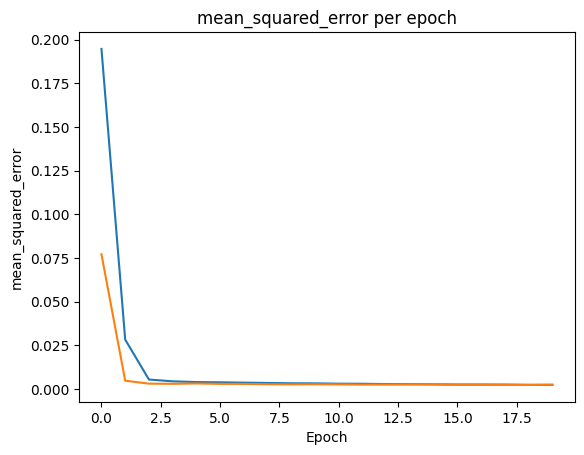

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("mean_squared_error")
plt.title("mean_squared_error per epoch")
plt.show()

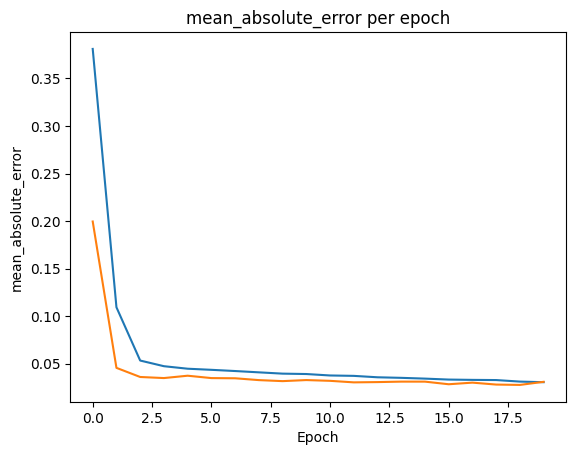

In [43]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel("Epoch")
plt.ylabel("mean_absolute_error")
plt.title("mean_absolute_error per epoch")
plt.show()

In [44]:
model1 = keras.models.load_model('model.keras')

model1.evaluate(x_test,y_test)

 7/34 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0028 - mean_absolute_error: 0.0305

W0000 00:00:1718109133.860357      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - loss: 0.0023 - mean_absolute_error: 0.0279


[0.00213672686368227, 0.027273165062069893]

### MobileNet

In [45]:
from keras.applications import MobileNet

# Loading MobileNet model
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
feature_extractor = Model(inputs=mobilenet_model.input, outputs=mobilenet_model.get_layer('conv_pw_13_relu').output)

# Freezing convolutional layers
for layer in feature_extractor.layers:
    layer.trainable = False

# Adding dense layers on top
x = feature_extractor.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(30, activation='linear')(x)

# Binding model
model = Model(inputs=feature_extractor.input, outputs=output)

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_mean_absolute_error', save_best_only=True, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(mode='min', monitor='val_mean_absolute_error', factor=0.1, patience=5, min_lr=0.00000001, verbose=1)

model.summary() # printing summary of model

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 48, 48, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 48, 48, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 48, 48, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 48, 48, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 24, 24, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 24, 24, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 24, 24, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 24, 24, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,346,014 (16.58 MB)

 Trainable params: 1,117,150 (4.26 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) # compiling and fitting model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=40,callbacks=[reduce_lr,model_checkpoint])

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3512 - mean_absolute_error: 0.4452

W0000 00:00:1718109161.319055      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_mean_absolute_error improved from inf to 0.12192, saving model to model.keras


W0000 00:00:1718109165.856772      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - loss: 0.3498 - mean_absolute_error: 0.4442 - val_loss: 0.0300 - val_mean_absolute_error: 0.1219 - learning_rate: 0.0010
Epoch 2/20
122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0199 - mean_absolute_error: 0.1027
Epoch 2: val_mean_absolute_error improved from 0.12192 to 0.03452, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0197 - mean_absolute_error: 0.1020 - val_loss: 0.0029 - val_mean_absolute_error: 0.0345 - learning_rate: 0.0010
Epoch 3/20
120/124 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 - mean_absolute_error: 0.0470
Epoch 3: val_mean_absolute_error improved from 0.03452 to 0.03319, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0044 - mean_absolute_error: 0.0470 - val_loss: 0.0027 - val_mean_absolute_error: 0.0332 - learning_rate: 0.0010
Epoch 4/20
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0440
Epoch 4: val_mean_absolute

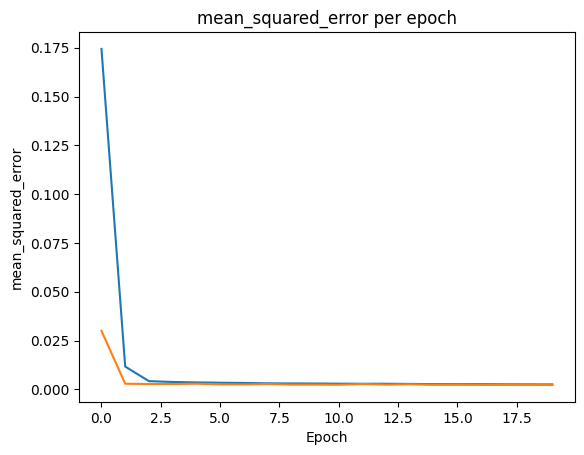

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("mean_squared_error")
plt.title("mean_squared_error per epoch")
plt.show()

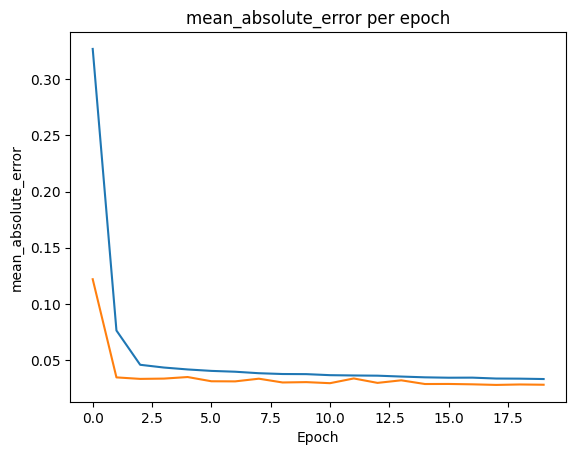

In [48]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel("Epoch")
plt.ylabel("mean_absolute_error")
plt.title("mean_absolute_error per epoch")
plt.show()

In [49]:
model1 = keras.models.load_model('model.keras')

model1.evaluate(x_test,y_test)

25/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0292

W0000 00:00:1718109199.985028      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0023 - mean_absolute_error: 0.0289


[0.002165157115086913, 0.02803158387541771]

### CNN

In [50]:
model = Sequential()

model.add(InputLayer(shape=(96, 96, 3))) # input layer

# convolutional block
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

# convolutional block
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

# convolutional block
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

# convolutional block
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(GlobalAveragePooling2D()) # pooling down

model.add(Dense(1024, activation='relu')) # dense layer
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(30, activation='linear')) # output layer

model_checkpoint = ModelCheckpoint('model.keras', monitor='val_mean_absolute_error', save_best_only=True, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(mode='min', monitor='val_mean_absolute_error', factor=0.1, patience=5, min_lr=0.00000001, verbose=1)

model.summary() # printing summary of model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_98 (Conv2D)              │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 96, 96, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_101         │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,710 (967.62 KB)

 Trainable params: 247,198 (965.62 KB)

 Non-trainable params: 512 (2.00 KB)

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error']) # compiling and fitting model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, batch_size=40,callbacks=[model_checkpoint])

Epoch 1/40
  7/124 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2544 - mean_absolute_error: 0.4092

W0000 00:00:1718109213.047409      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0675 - mean_absolute_error: 0.1754

W0000 00:00:1718109220.285065      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_mean_absolute_error improved from inf to 0.06876, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - loss: 0.0672 - mean_absolute_error: 0.1748 - val_loss: 0.0077 - val_mean_absolute_error: 0.0688
Epoch 2/40
  4/124 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0537

W0000 00:00:1718109222.275851      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


122/124 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0524
Epoch 2: val_mean_absolute_error did not improve from 0.06876
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0524 - val_loss: 0.0098 - val_mean_absolute_error: 0.0772
Epoch 3/40
121/124 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0474
Epoch 3: val_mean_absolute_error improved from 0.06876 to 0.04795, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0043 - mean_absolute_error: 0.0474 - val_loss: 0.0046 - val_mean_absolute_error: 0.0480
Epoch 4/40
123/124 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0447
Epoch 4: val_mean_absolute_error improved from 0.04795 to 0.04528, saving model to model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0040 - mean_absolute_error: 0.0447 - val_loss: 0.0041 - val_mean_absolute_error: 0.0453
Epoch 5/40
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 17

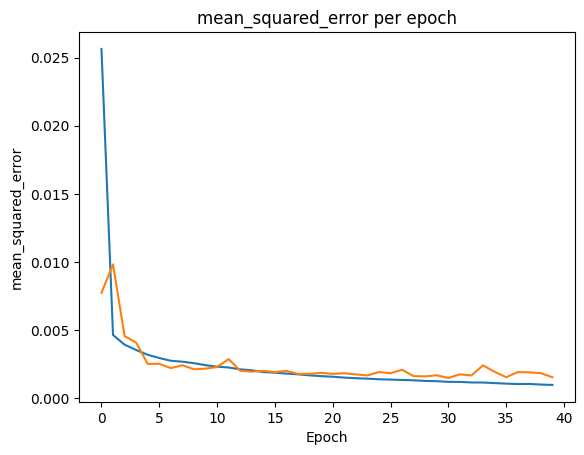

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("mean_squared_error")
plt.title("mean_squared_error per epoch")
plt.show()

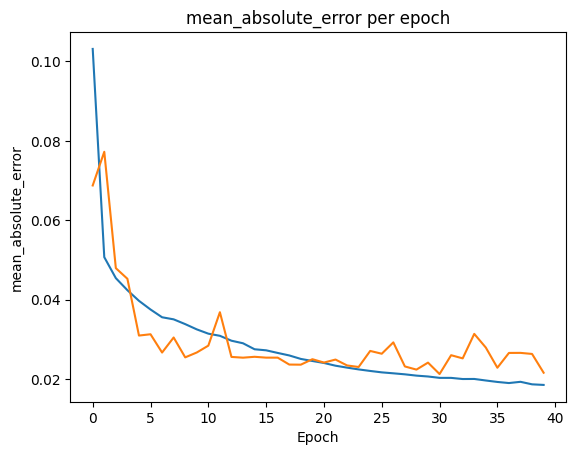

In [53]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel("Epoch")
plt.ylabel("mean_absolute_error")
plt.title("mean_absolute_error per epoch")
plt.show()

In [56]:
model1 = keras.models.load_model('model.keras')

model1.evaluate(x_test,y_test)

28/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0219 

W0000 00:00:1718109471.479821      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - mean_absolute_error: 0.0218


[0.0013460729969665408, 0.021435078233480453]